## Introduction
In this notebook, I walk through a step-by-step approach to prepare for building a clustering model. The process is broken down into three main steps:

**1. Defining the Business Problem:**

**2. Conducting Exploratory Data Analysis (EDA):**

**3. Feature Selection and Engineering:**

## Business Problem
The project focuses on a retail store that wants to get a better understanding of its customers by grouping them based on their preferences. This segmentation helps the store adapt its product offerings more effectively. Additionally, the store aims to boost customer loyalty by examining customer behaviors and preferences. With these insights, the store plans to design a customized loyalty program that offers unique rewards to different customer groups. This approach is intended to encourage repeat business, create a stronger connection between customers and the brand, make customers feel valued, and ultimately increase brand loyalty.

#### Importing the libraries

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from supp_functions.eda_utils import *

#### Importing the dataset

In [4]:
df = pd.read_csv('dataset/marketing_campaign.csv', sep='\t')

In [5]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
62,1012,1952,Graduation,Single,61823.0,0,1,18-02-2013,26,523,7,134,37,14,169,4,8,2,10,7,0,0,0,0,0,0,3,11,0
1740,48,1964,Graduation,Together,55761.0,0,1,24-04-2014,97,136,1,12,0,3,32,2,4,1,3,6,0,1,0,0,0,0,3,11,0
1890,2747,1988,PhD,Married,67546.0,0,0,31-08-2012,90,864,134,768,150,38,172,1,4,10,5,3,0,0,0,0,0,0,3,11,0
2201,10968,1969,Graduation,Single,57731.0,0,1,23-11-2012,0,266,21,300,65,8,44,4,8,8,6,6,0,0,0,0,0,0,3,11,0
665,10826,1959,Graduation,Married,18690.0,0,0,28-12-2012,77,6,1,7,23,4,19,1,1,1,2,8,0,0,0,0,0,0,3,11,0


#### Preprocessing Data to EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We have a total of 28 features, excluding the ID. Among them, there are 2 categorical features and 26 numerical features.

**People:** 

- **ID:** customer's unique identifier
- **Year_Birth:** customer's birth year
- **Education:** customer's education level
- **Marital_Status:** customer's marital status
- **Income:** customer's yearly household income
- **Kidhome:** number of children in customer's household
- **Teenhome:** number of teenagers in customer's household
- **Dt_Customer:** date of customer's enrollment with the company
- **Recency:** number of days since customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

**Products:** 
- **MntWines:** amount spent on wine in last 2 years
- **MntFruits:** amount spent on fruits in last 2 years
- **MntMeatProducts:** amount spent on meat in last 2 years
- **MntFishProducts:** amount spent on fish in last 2 years
- **MntSweetProducts:** amount spent on sweets in last 2 years
- **MntGoldProds:** amount spent on gold in last 2 years

These product features represent the amounts spent on each type of product.

**Marketing Promotion:** 

- **NumDealsPurchases:** number of purchases made with a discount
- **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place:** 

- **NumWebPurchases:** number of purchases made through the company’s website
- **NumCatalogPurchases:** number of purchases made using a catalogue
- **NumStorePurchases:** number of purchases made directly in stores
- **NumWebVisitsMonth:** number of visits to company’s website in the last month

Let's check our data for any missing values and duplicate records, as these could cause problems in our analysis.

In [7]:
pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])

,Missing Values
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Only the Income column has missing values. I have two options: either remove those records or replace the missing values with an appropriate value. I decided to fill them in with the average of all the incomes.

In [8]:
df.Income = df.Income.fillna(df.Income.mean())

Checking duplicated values

In [9]:
print(f'Duplicated rows: {df.duplicated().sum()}')

Duplicated rows: 0


There are no duplicate values, indicating that we do not have any duplicated IDs.

To prepare for the exploratory data analysis (EDA), I'm going to remove a few columns that don't really add value to our study. Specifically, I'll drop the columns Z_CostContact and Z_Revenue since we don't have clear information about what they represent. I'll also remove the ID column because it essentially serves the same purpose as the Pandas index.

In [10]:
df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

Furthermore, I'll change all the column names to lowercase. I prefer doing this because it makes the dataset more consistent and easier to read.

In [11]:
df.columns = [x.lower() for x in df.columns]

Rename columns for better readability

In [12]:
df.rename(
    columns={
        'mntfishproducts': 'mnt_fish',
        'mntmeatproducts': 'mnt_meat',
        'mntsweetproducts': 'mnt_sweet',
        'mntgoldprods': 'mnt_gold',
        'mntfruits': 'mnt_fruits',
        'mntwines': 'mnt_wines',
        'numcatalogpurchases': 'num_catalog_purchases',
        'numdealspurchases': 'num_deals_purchases',
        'numstorepurchases': 'num_store_purchases',
        'numwebpurchases': 'num_web_purchases',
        'numwebvisitsmonth': 'num_web_visits_month',
    },
    inplace=True,
)

Finally, I'll convert the customer_dt column to datetime format.

In [13]:
df.dt_customer = pd.to_datetime(df.dt_customer, format='%d-%m-%Y', errors='coerce')

## Exploratory Data Analysis (EDA)

In [14]:
# Identify and store numerical and categorical features in variables for easy access.
num_cols = df.select_dtypes(exclude='object').columns
cat_cols = df.select_dtypes(include='object').columns
print(f'Numerical columns: {num_cols.tolist()}')
print(f'Categorical columns: {cat_cols.tolist()}')

Numerical columns: ['year_birth', 'income', 'kidhome', 'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits', 'mnt_meat', 'mnt_fish', 'mnt_sweet', 'mnt_gold', 'num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'response']
Categorical columns: ['education', 'marital_status']


### EDA - Categorical Features

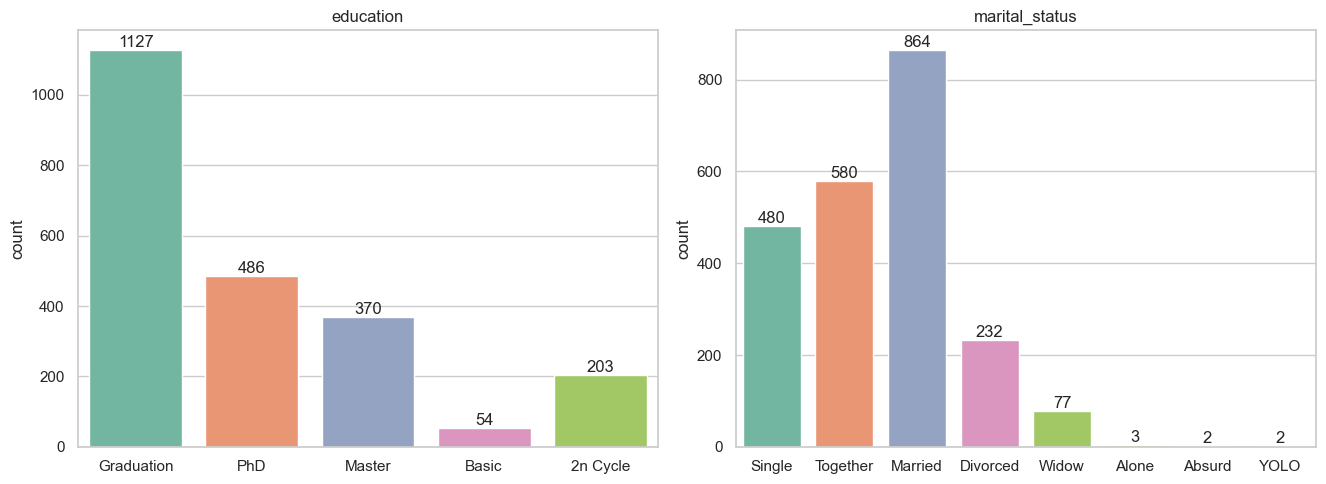

In [15]:
sns_plots(data=df, features=cat_cols, countplot=True, palette='Set2')

The education levels aren’t well-balanced, which might make it harder for the model to distinguish between them. To improve analysis and modeling, education levels will be grouped into undergraduate, graduate, and postgraduate categories.

In [16]:
df.education = df.education.replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    }
)

**Marital Status.** 
- The majority of people are either Married or Together.

Like with education, the marital status categories aren’t evenly spread, which could be a problem for sampling. To address this, I'll create a new column called has_partner, grouping statuses into "yes" or "no", and remove the original marital_status column.

In [17]:
df["has_partner"] = df.marital_status.replace(
    {
        "Married": "yes",
        "Together": "yes",
        "Absurd": "no",
        "Alone": "no",
        "Widow": "no",
        "YOLO": "no",
        "Divorced": "no",
        "Single": "no",
    }
)

In [18]:
df.drop("marital_status", axis=1, inplace=True)

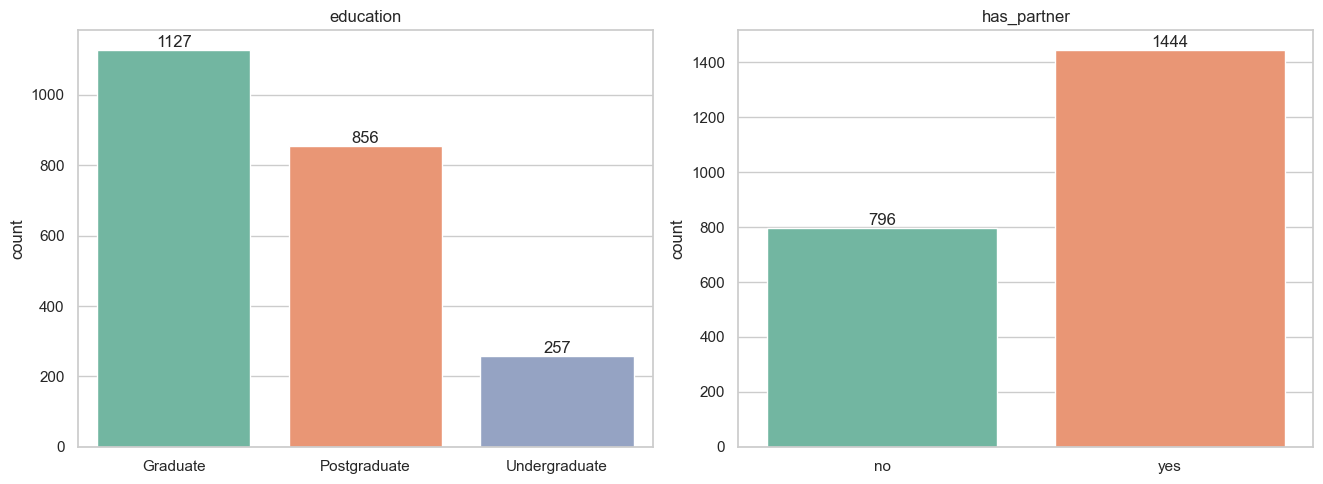

In [19]:
cat_cols = df.select_dtypes(include='object').columns
sns_plots(data=df, features=cat_cols, countplot=True, palette='Set2')

#### Analysis

- Most people in the dataset have higher education.
- The majority of people has a partner.

In [20]:
cols_to_compare = [
    "income",
    "mnt_fish",
    "mnt_meat",
    "mnt_sweet",
    "mnt_gold",
    "mnt_fruits",
    "mnt_wines",
    "num_catalog_purchases",
    "num_deals_purchases",
    "num_store_purchases",
    "num_web_purchases",
    "num_web_visits_month",
]

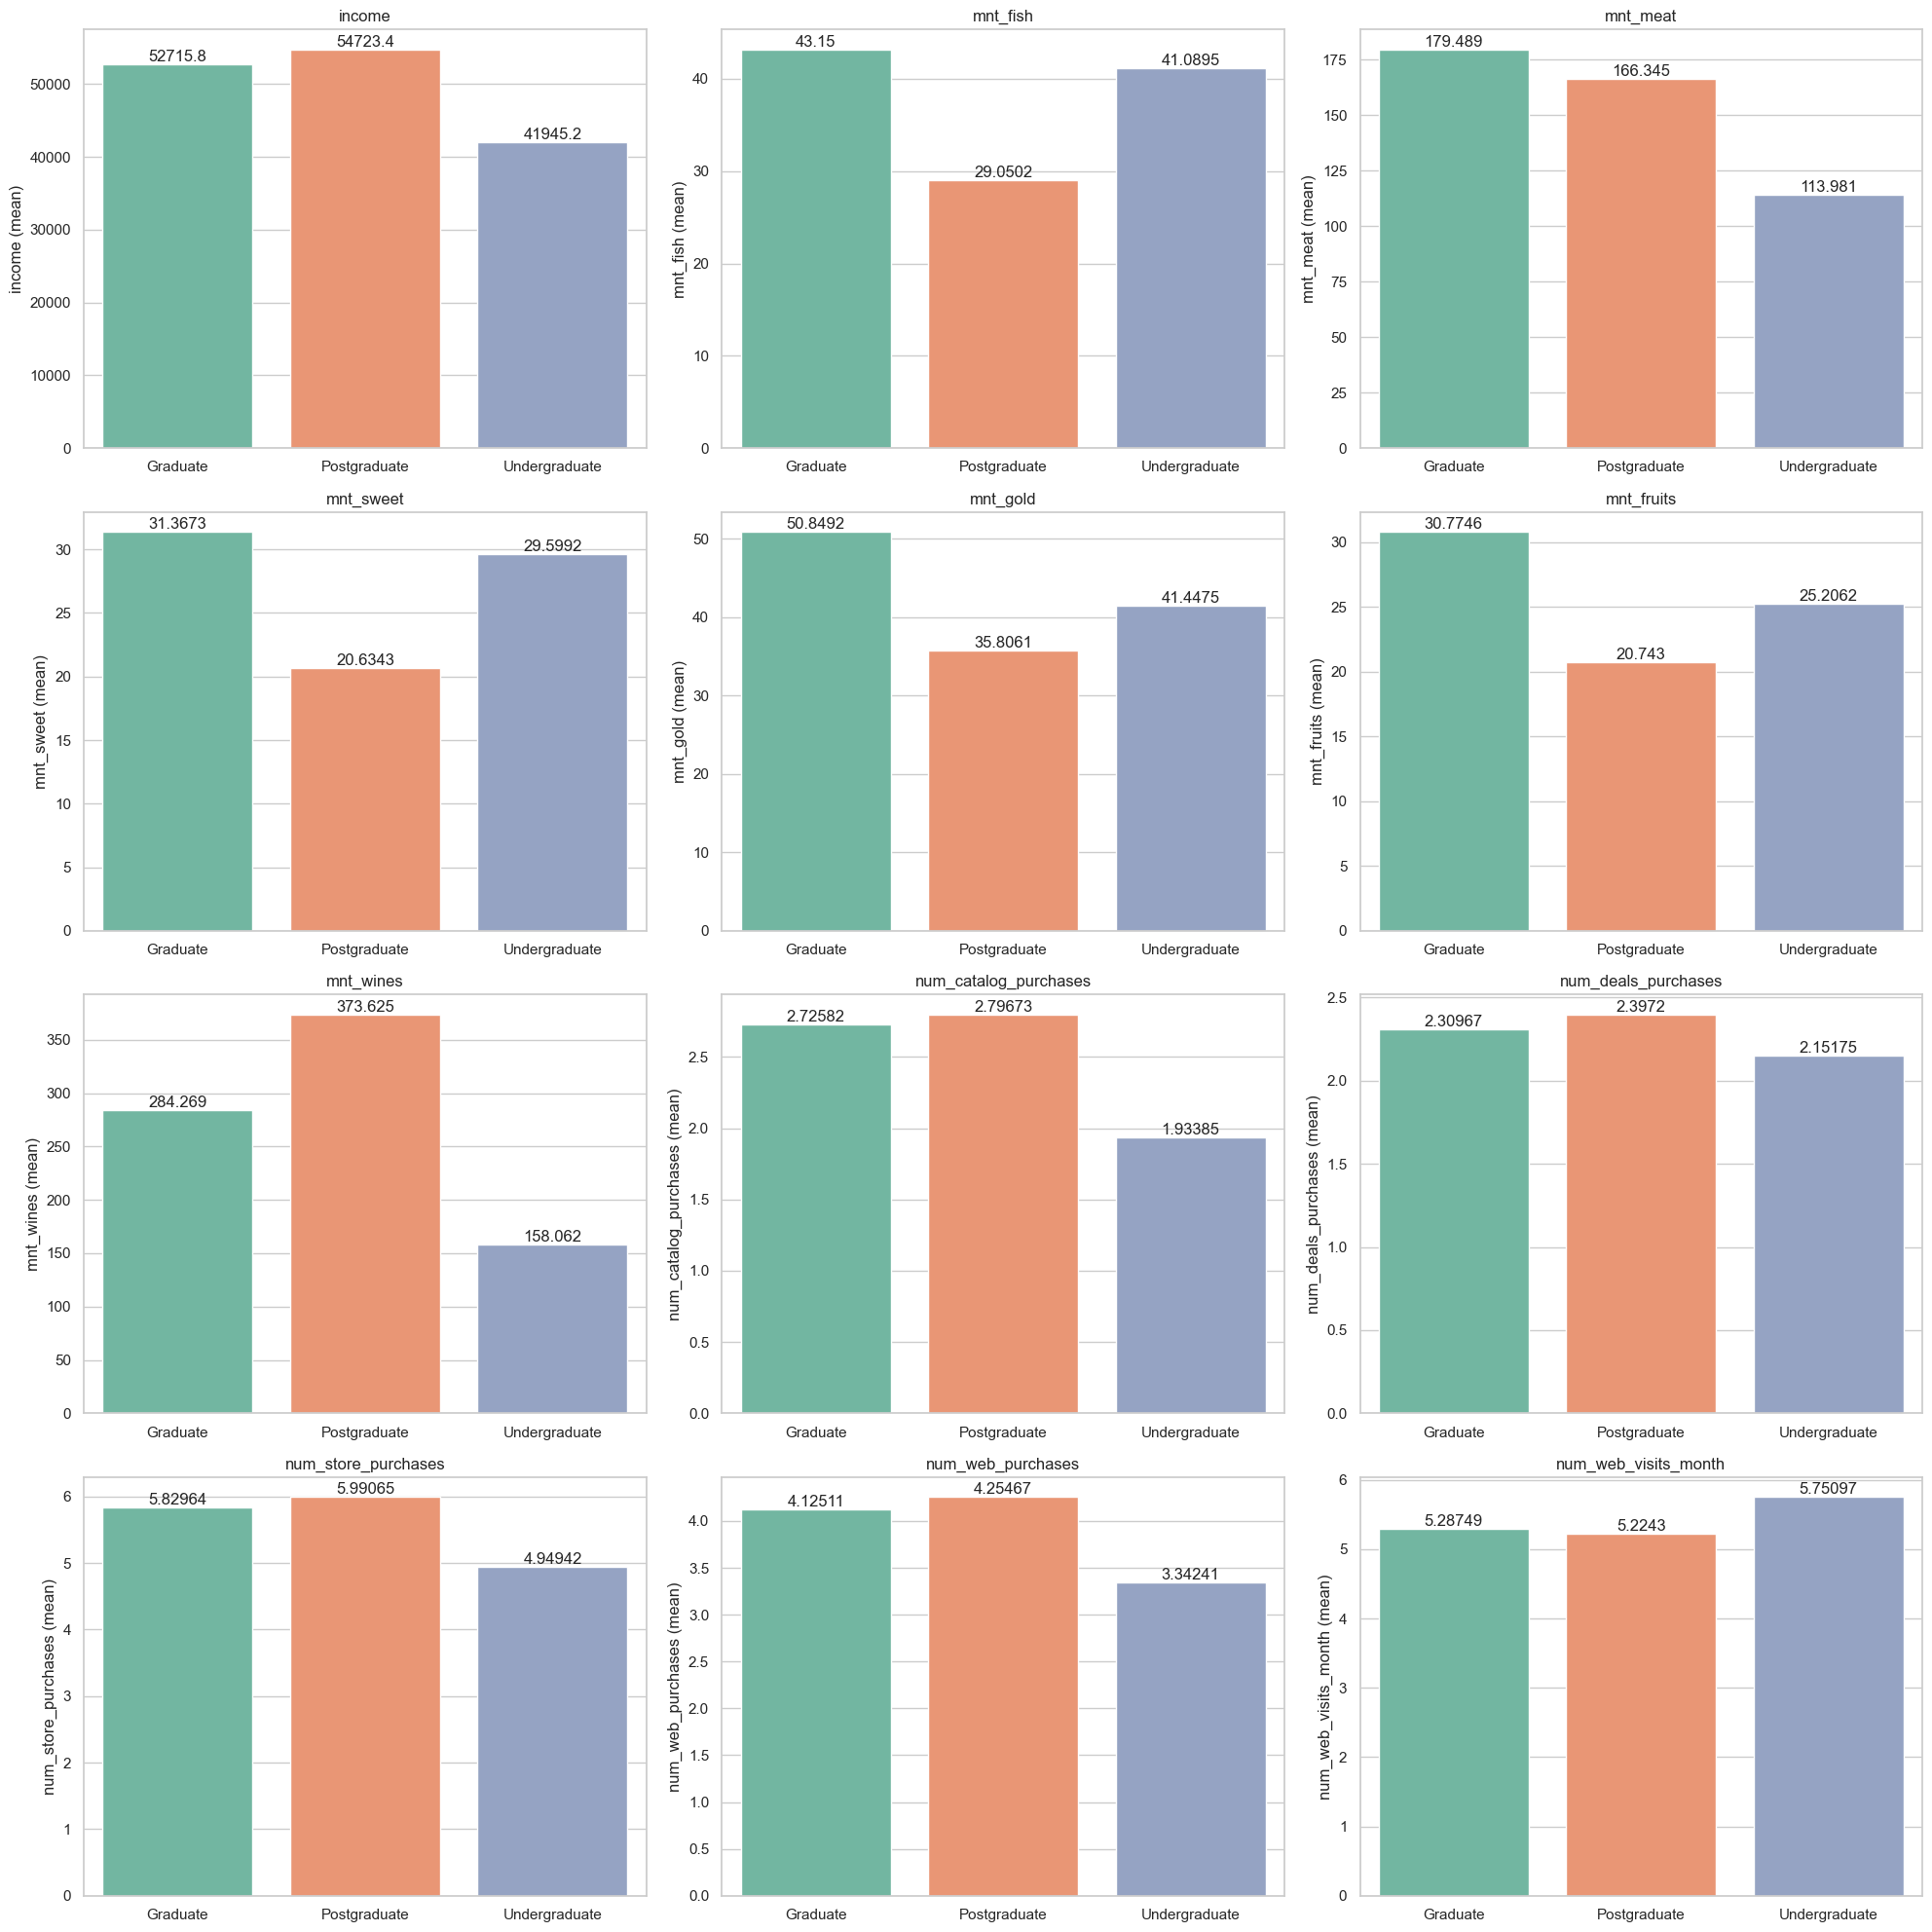

In [21]:
sns_plots(data=df, features=cols_to_compare, barplot_x='education',palette='Set2', barplot=True)

### EDA - Numerical Features

Before proceeding with the numerical analysis, I'll enhance and update the dataset by calculating:

- age of each customer, their total spending amount and the number of family members. 
- total amount spent for each type of product (fish, fruits, gold, meats, sweets, wines)
- total number of purchases for each type of purchase (catalog, deals, store, web)
- total acceptance of the marketing campaings
- time since last order
- frequency of purchases
- average spent on all purchases made by the customer

In [22]:
df['age'] = 2024 - df.year_birth

In [23]:
df['children'] = df.kidhome + df.teenhome

In [24]:
df['monetary'] = df['mnt_fish'] + df['mnt_fruits'] + df['mnt_gold'] + df['mnt_meat'] + df['mnt_sweet'] + df['mnt_wines']

In [25]:
df['num_total_purchases'] = df['num_catalog_purchases'] + df['num_deals_purchases'] + df['num_store_purchases'] + df['num_web_purchases']

In [26]:
df['total_accepted_cmp'] = df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5']
df['total_accepted_cmp'].value_counts(normalize=True)

total_accepted_cmp
0    0.793304
1    0.145089
2    0.037054
3    0.019643
4    0.004911
Name: proportion, dtype: float64

In [27]:
from datetime import datetime
current_date = datetime.today()
df['relationship_duration'] = (current_date.year - df['dt_customer'].dt.year) 

In [28]:
df['frequency'] = df['num_total_purchases'] / df['relationship_duration']
df['frequency'].describe().T

count    2240.000000
mean        1.238791
std         0.632838
min         0.000000
25%         0.636364
50%         1.250000
75%         1.750000
max         3.583333
Name: frequency, dtype: float64

In [29]:
df['avg_purchase_value'] = df['monetary'] / df['num_total_purchases'].replace(0, np.nan)
df['avg_purchase_value'].describe().T

count    2236.000000
mean       33.330979
std        45.032550
min         0.533333
25%         9.714286
50%        23.379808
75%        45.353365
max      1679.000000
Name: avg_purchase_value, dtype: float64

In [30]:
df.drop(['kidhome', 'teenhome', 'year_birth', 'dt_customer', 'relationship_duration'], axis=1, inplace=True)

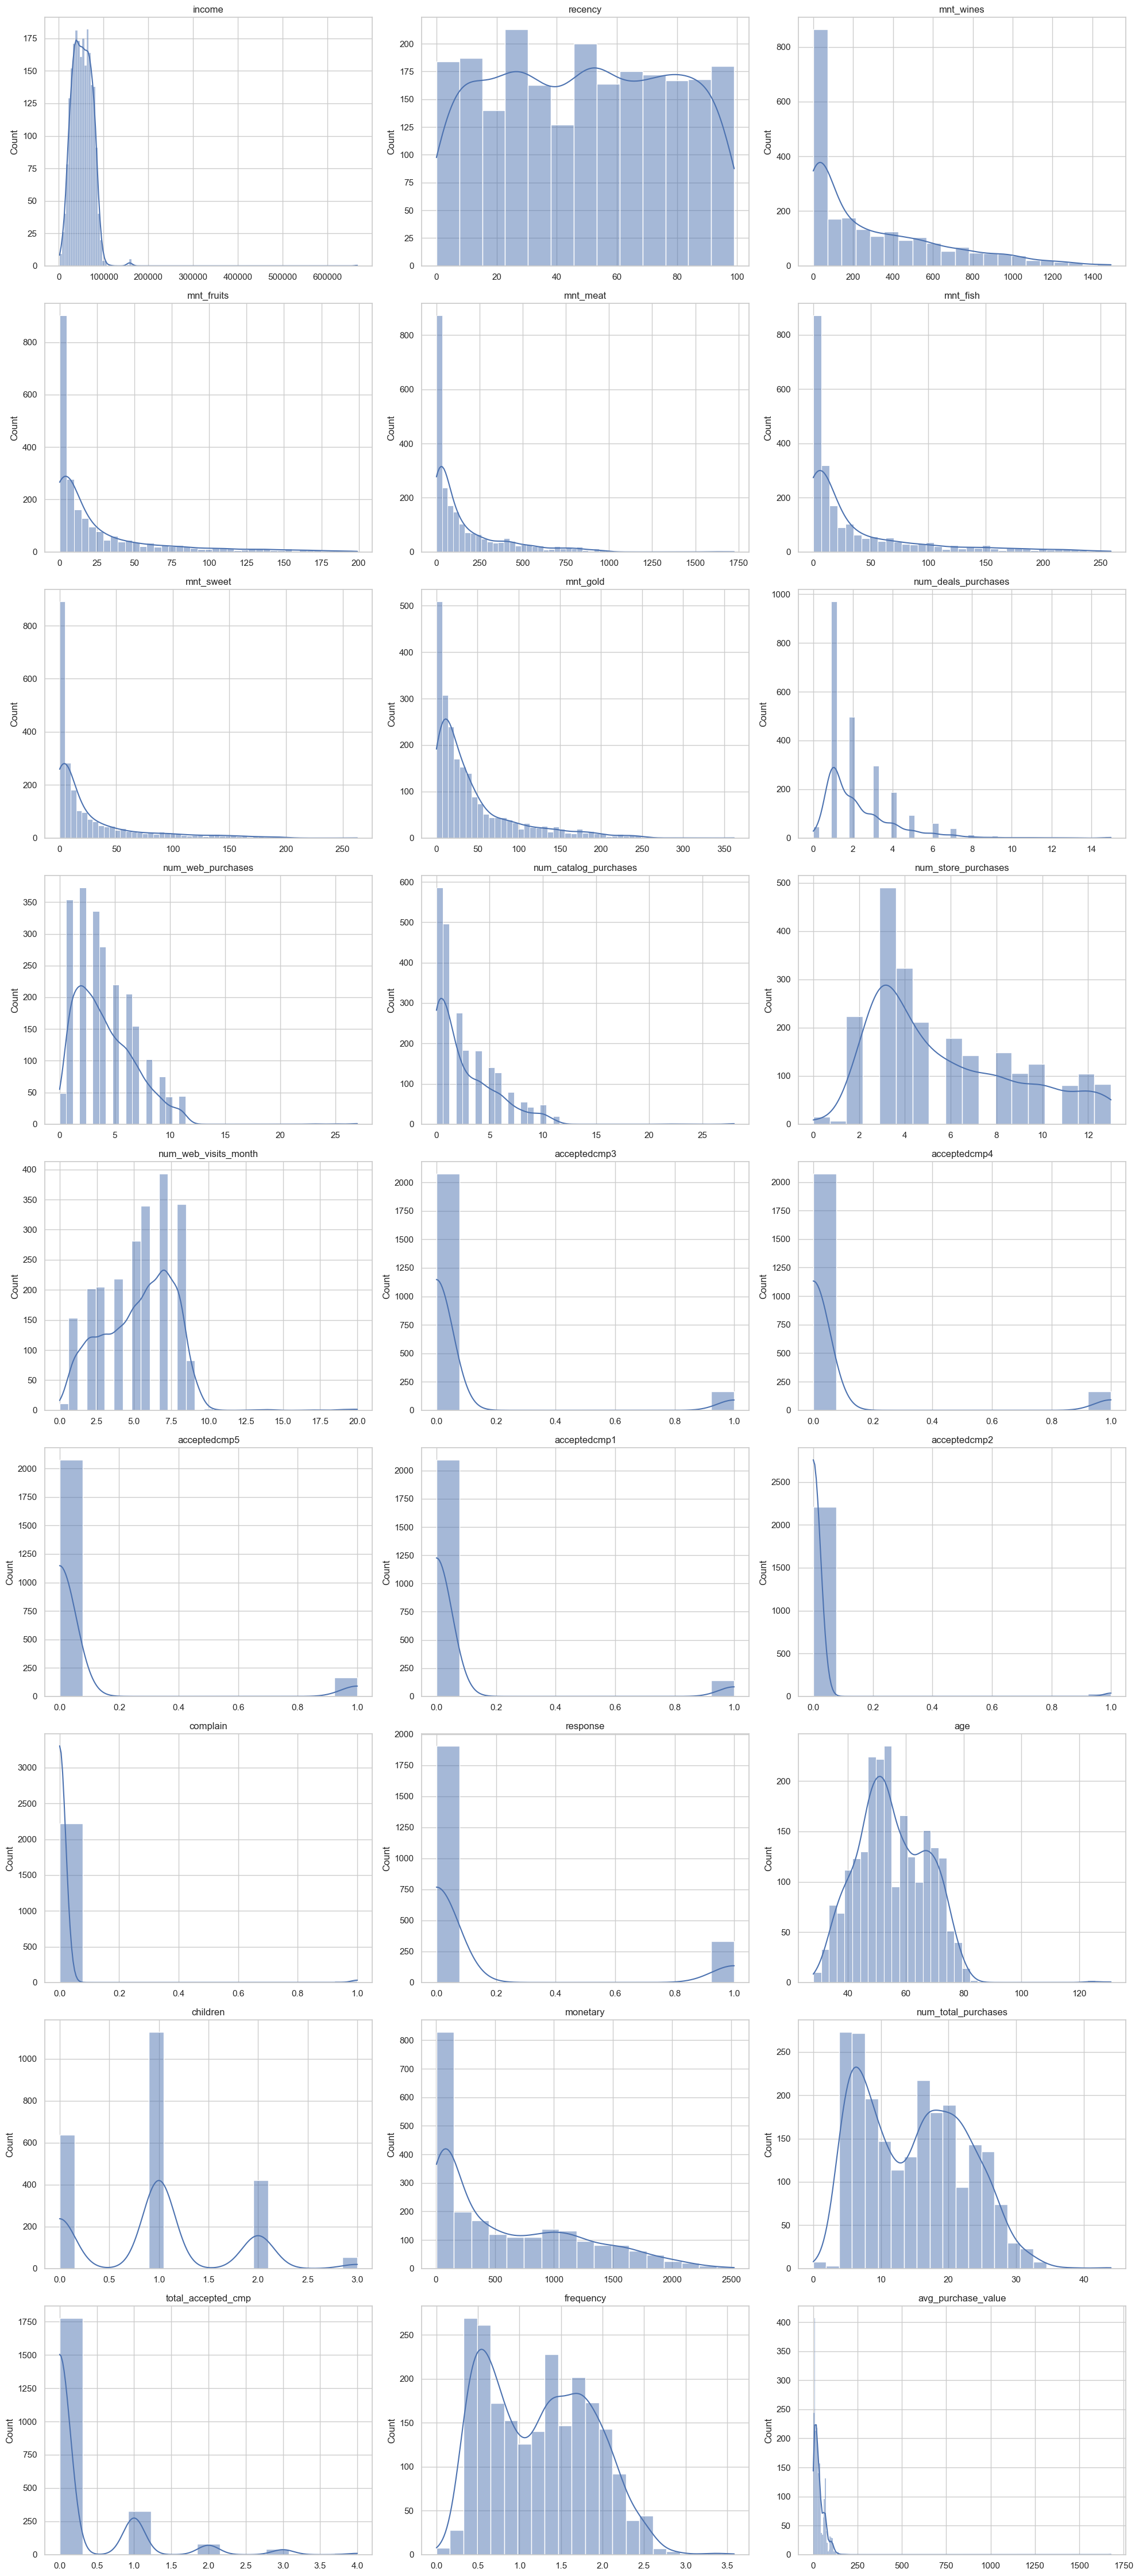

In [31]:
num_cols = df.select_dtypes(exclude='object').columns
sns_plots(data=df, features=num_cols, histplot=True, kde=True)

In [32]:
df[num_cols].describe()

,income,recency,mnt_wines,mnt_fruits,mnt_meat,mnt_fish,mnt_sweet,mnt_gold,num_deals_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,num_web_visits_month,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,children,monetary,num_total_purchases,total_accepted_cmp,frequency,avg_purchase_value
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2236.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,55.194196,0.950446,605.798214,14.862054,0.297768,1.238791,33.330979
std,25037.797168,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,0.751803,602.249288,7.677173,0.678381,0.632838,45.032550
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.533333
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,68.750000,8.000000,0.000000,0.636364,9.714286
50%,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1.000000,396.000000,15.000000,0.000000,1.250000,23.379808
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1.000000,1045.500000,21.000000,0.000000,1.750000,45.353365
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,3.000000,2525.000000,44.000000,4.000000,3.583333,1679.000000


#### Analysis

- The income data contains some extreme outliers, where values are more than 10 times the mean. These need to be removed to avoid skewing the analysis.
- The recency variable is fairly evenly distributed, suggesting it might not be a strong factor in clustering models.
- Product spending (wine, fruits, meat, fish, sweets, gold, monetary) shows that most customers make small to moderate purchases, but a few spend significantly more.
- Purchase quantity data reveals that while most customers make a moderate number of purchases—both online and in-store—some make an unusually high number of transactions.
- Very few customers have responded to any of the store's marketing campaigns, indicating that these campaigns may not be effective. Clustering analysis could help in segmenting customers and designing better-targeted marketing strategies.
- Most customers are between 40 and 60 years old, but there are some records of customers over 100 years old, which might need to be removed as they could be outdated or inaccurate.
- The majority of customers have zero or one child, while only a small percentage have two or more.

### Outliers analysis

In [33]:
# these columns are irrelevant for our analysis
to_exclude = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'complain', 'response', 'monetary', 'total_accepted_cmp', 'num_total_purchases', 'avg_purchase_value']
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=df, features=df[num_cols].columns.difference(to_exclude), verbose=True)

There are 1301 outliers in the dataset.

Number (percentage) of outliers per feature: 

age: 3 (0.13)%
children: 53 (2.37)%
frequency: 1 (0.04)%
income: 8 (0.36)%
mnt_fish: 223 (9.96)%
mnt_fruits: 227 (10.13)%
mnt_gold: 207 (9.24)%
mnt_meat: 175 (7.81)%
mnt_sweet: 248 (11.07)%
mnt_wines: 35 (1.56)%
num_catalog_purchases: 23 (1.03)%
num_deals_purchases: 86 (3.84)%
num_store_purchases: 0 (0.0)%
num_web_purchases: 4 (0.18)%
num_web_visits_month: 8 (0.36)%
recency: 0 (0.0)%


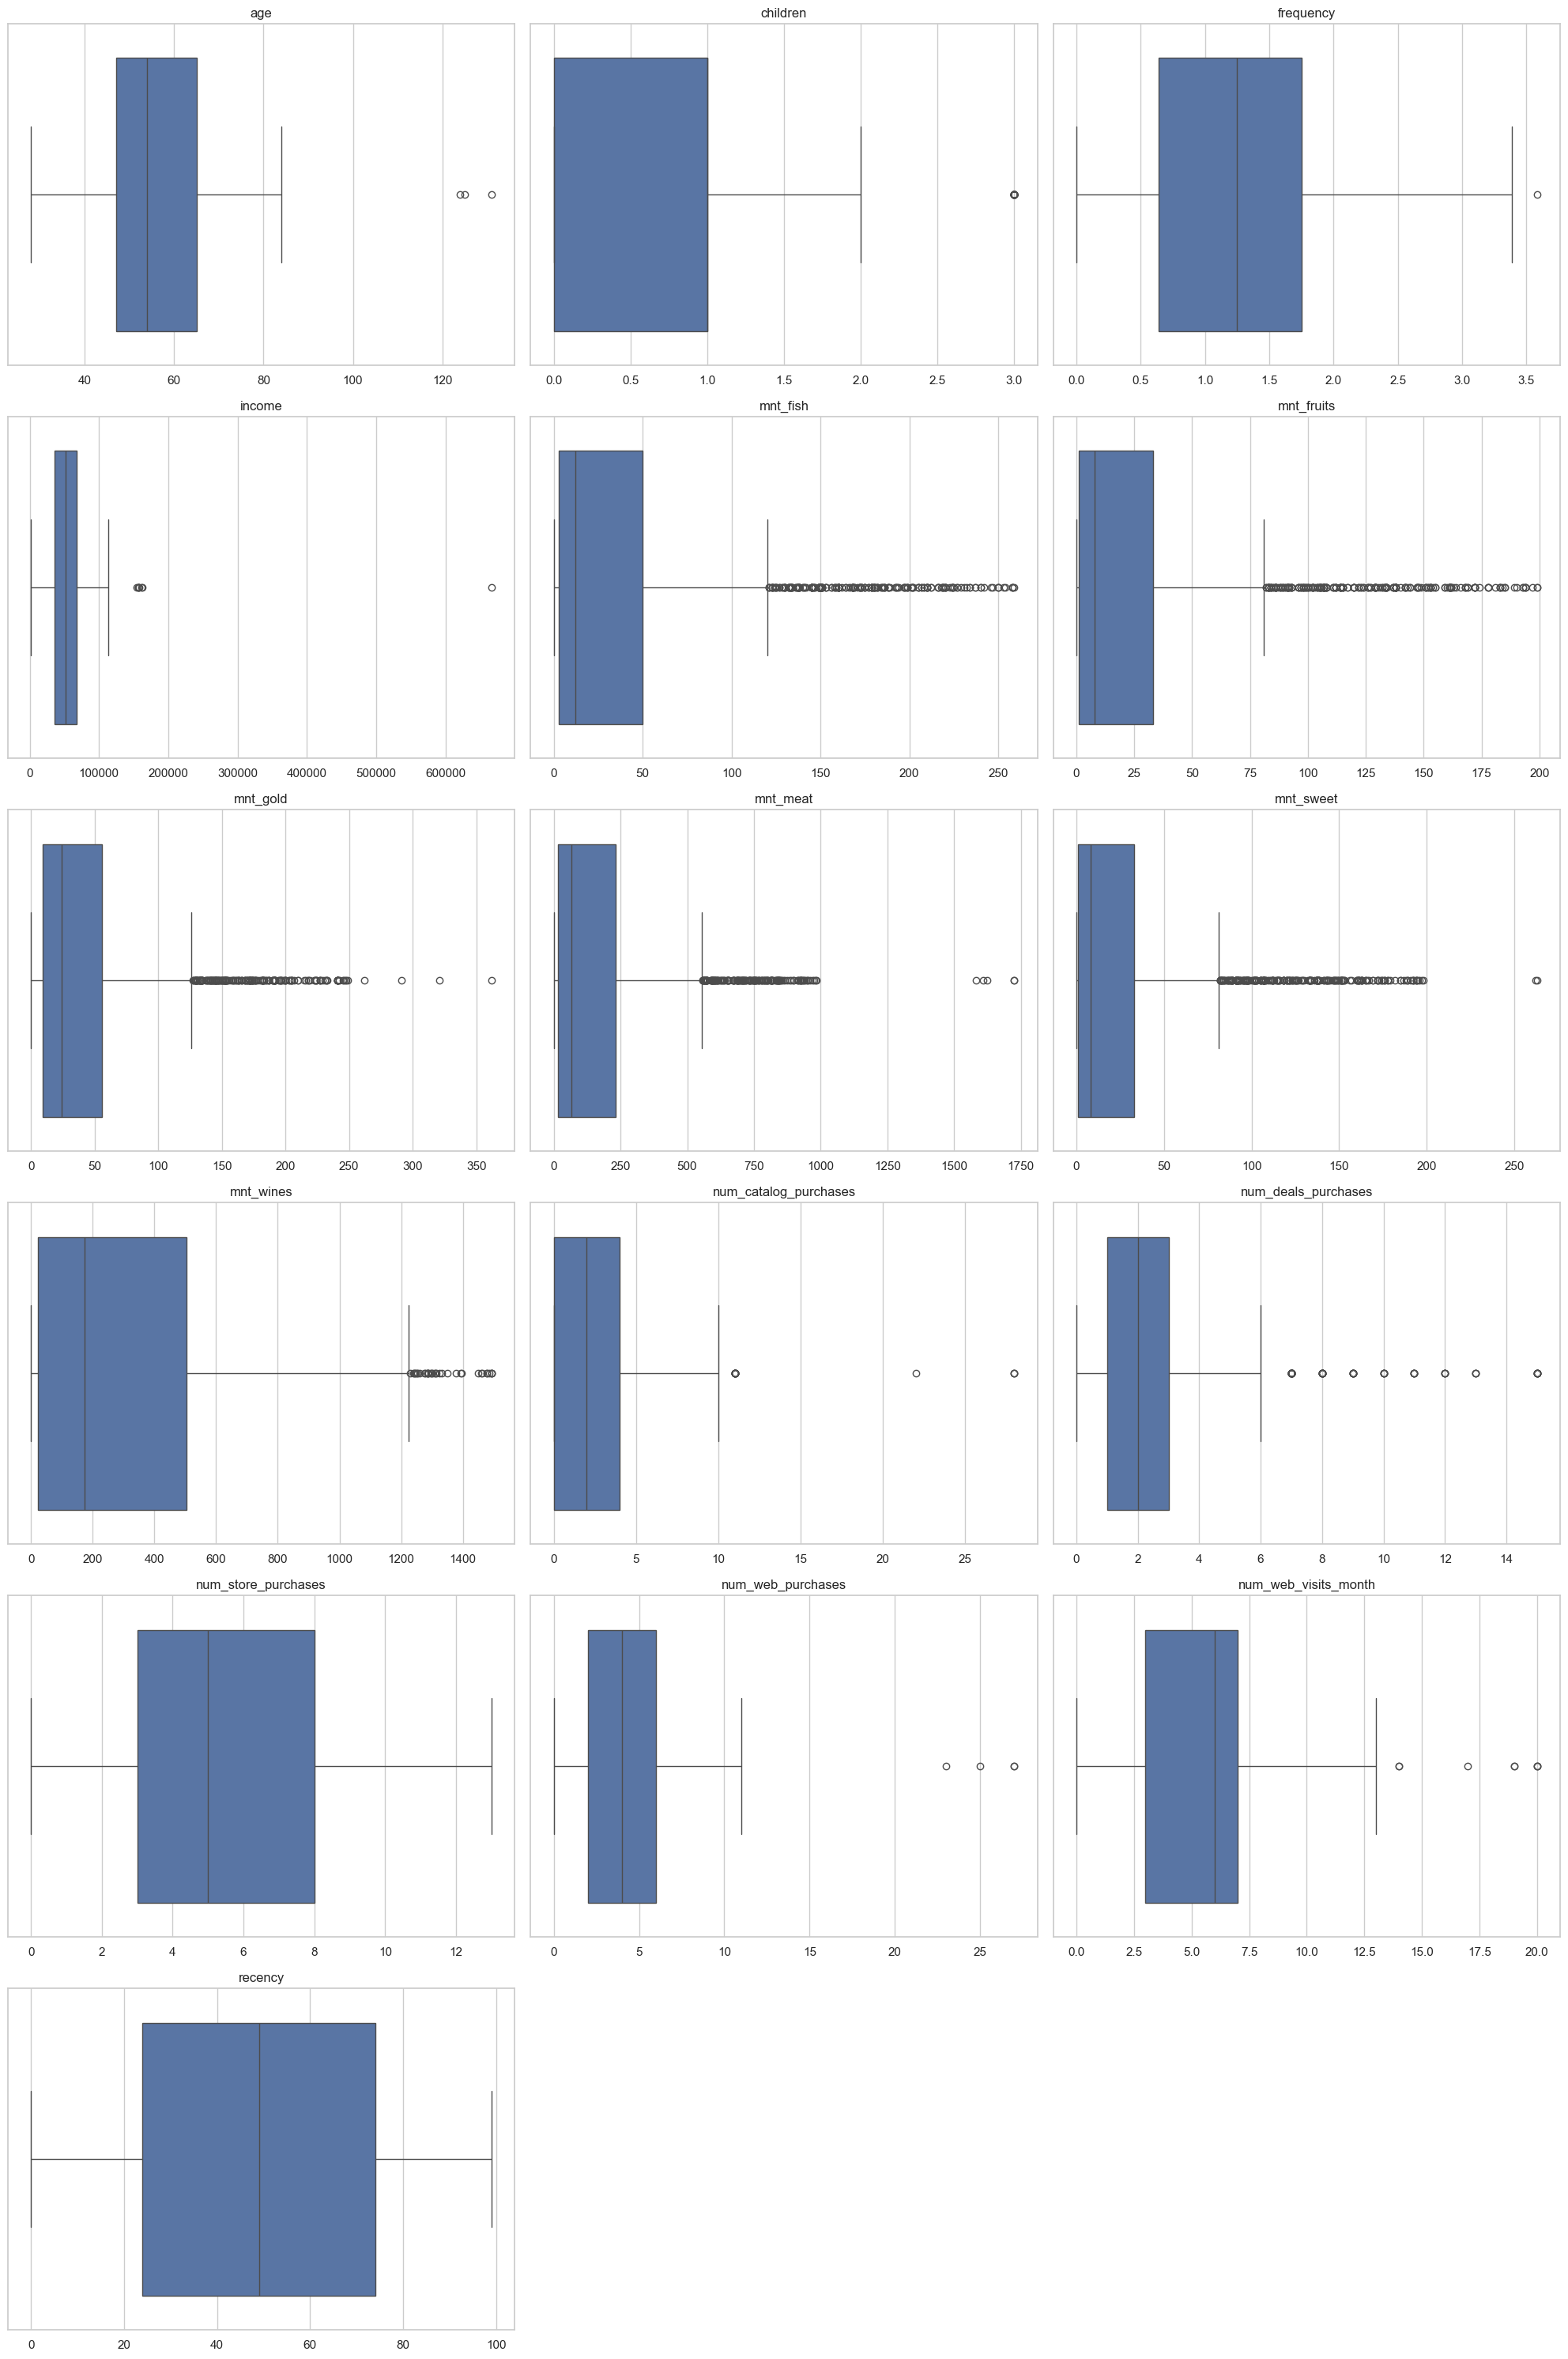

In [34]:
sns_plots(data=df, features=df[num_cols].columns.difference(to_exclude), outliers=True)

- Naturally, there are a lot of outliers in the features that indicate the spending amounts on various product types, which reflect the distinct purchase behaviours of customers. I won't be removing these outliers because they don't produce inconsistent information.
- There aren't many outliers in either income or age. Interestingly, a few clients has more than 120 years, and one had an income of $600,000—ten times greater than the average. I intend to delete these outliers because they could introduce inconsistent information.

Clustering algorithms are generally sensitive to outliers. Removing outliers from year of birth and income can enhance algorithm performance by eliminating potentially misleading data points.

I won't remove any outliers from features like spending amounts on products. Removing new customers from clustering would be harmful if they exhibit higher spending tendencies. In addition, the impact of anomalies can be greatly reduced by using dimensionality reduction techniques prior to modelling.

In [35]:
to_drop_indexes = outlier_indexes['income'] + outlier_indexes['age']
df.drop(to_drop_indexes, axis=0, inplace=True)

### Correlation Matrix

In [36]:
to_ignore = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'complain', 'response']
cols = df[num_cols].columns.difference(to_ignore)
corr_matrix = df[cols].corr()

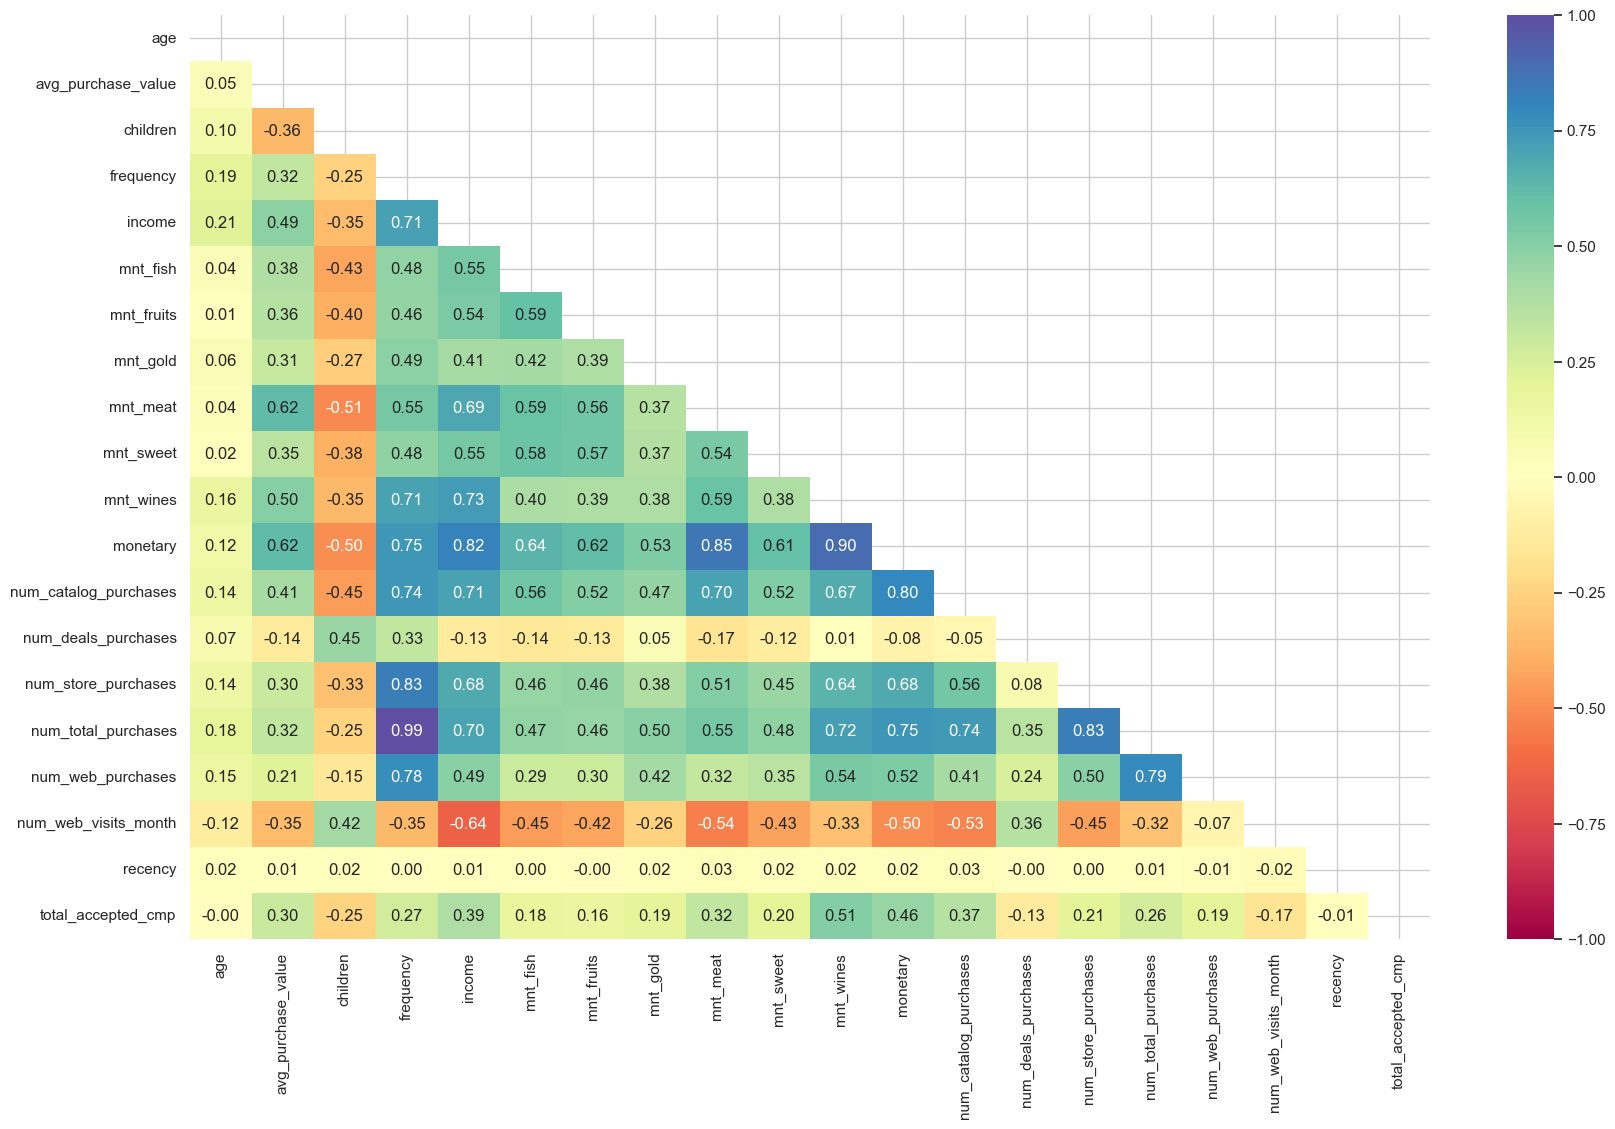

In [37]:
plt.figure(figsize=(20, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
    mask=np.triu(corr_matrix),
)
plt.show()

In our primary visualization, we can clearly observe both positive and negative relationships between various features. Let's delve into these relationships.

**Income**

- Customers with higher incomes tend to buy more items.
- Higher-income customers are more likely to make purchases through the web, store, and catalog, while lower-income customers are more likely to spend through deals.
- Customers with higher incomes are more likely to accept campaigns.
- Customers with higher incomes tend to use the website less frequently.

**Monetary**

- Customers with children spend less on products.
- Customers with higher spending tend to use the website less frequently.

**Frequency**

- Customers with high frequency tend to accept more campaigns.
- Customers with high frequency tend to use the store's website less frequently.

**Children**

- Customers with children tend to use deal purchases more.
- Customers with children tend to use the store's website more.
- Customers with children tend to spend less in the store.

**Recency**

- There is no significant correlation between recency and other factors.

Let's examine the overall performance of campaigns.

In [38]:
campaings = ['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5']

In [39]:
cmp_analysis = df.copy()
labels = ['$1500-$10000', '$10001-$20000', '$20001-$30000', '$30001-$40000', '$40001-$50000', '$50001-$60000', '$60001-$70000', '$70001-$80000', '$80001-$90000', '$90001-$100000', '>$100000']
bin_edges = [1500, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 115000]
cmp_analysis['income_cat'] = pd.cut(x=cmp_analysis['income'], bins=bin_edges, labels=labels)

In [40]:
cmp_analysis.groupby(["income_cat"])[campaings].mean()

,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5
income_cat,,,,,
$1500-$10000,0.000000,0.000000,0.068966,0.000000,0.000000
$10001-$20000,0.000000,0.000000,0.112245,0.000000,0.000000
$20001-$30000,0.000000,0.000000,0.053498,0.000000,0.000000
$30001-$40000,0.002770,0.000000,0.096953,0.008310,0.000000
$40001-$50000,0.006098,0.012195,0.085366,0.042683,0.000000
$50001-$60000,0.017699,0.017699,0.056047,0.117994,0.008850
$60001-$70000,0.051205,0.012048,0.036145,0.108434,0.033133
$70001-$80000,0.161512,0.010309,0.061856,0.099656,0.151203
$80001-$90000,0.294479,0.061350,0.134969,0.171779,0.423313


- Campaigns 1, 4 and 5 were effective for customers with incomes exceeding $70,000. However, they were ineffective for clients with lower incomes.
- Campaign 3 had the most significant impact on clients with lower incomes.

In [41]:
bin_edges = list(range(0, 1600, 250))  
labels = ['$0-$250', '$251-$500', '$501-$750', '$751-$1000', '$1001-$1250', '$1251-$1500']

In [42]:
cmp_analysis['wines_cat'] = pd.cut(x=cmp_analysis['mnt_wines'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['wines_cat'])[campaings].mean().fillna(0)

,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5
wines_cat,,,,,
$0-$250,0.009516,0.004758,0.065028,0.018239,0.007137
$251-$500,0.061381,0.002558,0.058824,0.061381,0.035806
$501-$750,0.116608,0.010601,0.088339,0.127208,0.120141
$751-$1000,0.205882,0.023529,0.094118,0.229412,0.276471
$1001-$1250,0.370370,0.111111,0.148148,0.370370,0.444444
$1251-$1500,0.333333,0.233333,0.133333,0.500000,0.733333


Campaigns 1, 4, and 5 performed exceptionally well for wines.

In [43]:
cmp_analysis['fruits_cat'] = pd.cut(x=cmp_analysis['mnt_fruits'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['fruits_cat'])[campaings].mean().fillna(0)

,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5
fruits_cat,,,,,
$0-$250,0.068269,0.011469,0.072638,0.069361,0.082469
$251-$500,0.000000,0.000000,0.000000,0.000000,0.000000
$501-$750,0.000000,0.000000,0.000000,0.000000,0.000000
$751-$1000,0.000000,0.000000,0.000000,0.000000,0.000000
$1001-$1250,0.000000,0.000000,0.000000,0.000000,0.000000
$1251-$1500,0.000000,0.000000,0.000000,0.000000,0.000000


All campaigns performed poorly for fruits.

In [44]:
cmp_analysis['meat_cat'] = pd.cut(x=cmp_analysis['mnt_meat'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['meat_cat'])[campaings].mean().fillna(0)

,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5
meat_cat,,,,,
$0-$250,0.024005,0.010539,0.070843,0.060890,0.021663
$251-$500,0.154098,0.029508,0.072131,0.124590,0.186885
$501-$750,0.231884,0.000000,0.079710,0.101449,0.268116
$751-$1000,0.320000,0.040000,0.120000,0.133333,0.413333
$1001-$1250,0.000000,0.000000,0.000000,0.000000,0.000000
$1251-$1500,0.000000,0.000000,0.000000,0.000000,0.000000


For meats, campaigns 1 and 5 did a decent job.

In [45]:
cmp_analysis['fish_cat'] = pd.cut(x=cmp_analysis['mnt_fish'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['fish_cat'])[campaings].mean().fillna(0)

,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5
fish_cat,,,,,
$0-$250,0.067428,0.010332,0.068515,0.064165,0.078847
$251-$500,0.166667,0.000000,0.000000,0.000000,0.000000
$501-$750,0.000000,0.000000,0.000000,0.000000,0.000000
$751-$1000,0.000000,0.000000,0.000000,0.000000,0.000000
$1001-$1250,0.000000,0.000000,0.000000,0.000000,0.000000
$1251-$1500,0.000000,0.000000,0.000000,0.000000,0.000000


All campaings performed poorly for fishes

In [46]:
cmp_analysis['sweets_cat'] = pd.cut(x=cmp_analysis['mnt_sweet'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['sweets_cat'])[campaings].mean().fillna(0)

,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5
sweets_cat,,,,,
$0-$250,0.072376,0.009945,0.071823,0.064088,0.082873
$251-$500,0.000000,0.000000,0.000000,0.000000,0.000000
$501-$750,0.000000,0.000000,0.000000,0.000000,0.000000
$751-$1000,0.000000,0.000000,0.000000,0.000000,0.000000
$1001-$1250,0.000000,0.000000,0.000000,0.000000,0.000000
$1251-$1500,0.000000,0.000000,0.000000,0.000000,0.000000


All campaings performed poorly for sweets.

In [47]:
cmp_analysis['gold_cat'] = pd.cut(x=cmp_analysis['mnt_gold'], bins=bin_edges, labels=labels)
cmp_analysis.groupby(['gold_cat'])[campaings].mean().fillna(0)

,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5
gold_cat,,,,,
$0-$250,0.064233,0.013401,0.075323,0.074399,0.071627
$251-$500,0.000000,0.000000,0.000000,0.000000,0.000000
$501-$750,0.000000,0.000000,0.000000,0.000000,0.000000
$751-$1000,0.000000,0.000000,0.000000,0.000000,0.000000
$1001-$1250,0.000000,0.000000,0.000000,0.000000,0.000000
$1251-$1500,0.000000,0.000000,0.000000,0.000000,0.000000


All campaings performed poorly for golds.

Overall, the wine and pork campaigns did fairly well. In this situation, the business may concentrate on particular items in order to maximise profits. As an alternative, efforts might be focused on enhancing marketing campaigns for gold, sweets, seafood, and fruits.

### RFM Metric

In [48]:
rfm = df[['recency', 'frequency', 'monetary']]
rfm.head()

,recency,frequency,monetary
0,58,1.923077,1617
1,38,0.545455,27
2,26,1.750000,776
3,26,0.727273,53
4,94,1.727273,422


In [49]:
rfm['r_segment'] = pd.qcut(rfm['recency'], q=5, labels=[1,2,3,4,5]).astype(int)
rfm['f_segment'] = pd.qcut(rfm['frequency'], q=5, labels=[5,4,3,2,1]).astype(int)
rfm['m_segment'] = pd.qcut(rfm['monetary'], q=5, labels=[5,4,3,2,1]).astype(int)
rfm['RFM_Score'] = rfm[['r_segment', 'f_segment', 'm_segment']].sum(axis=1)
rfm.head()

,recency,frequency,monetary,r_segment,f_segment,m_segment,RFM_Score
0,58,1.923077,1617,3,1,1,5
1,38,0.545455,27,2,5,5,12
2,26,1.750000,776,2,2,2,6
3,26,0.727273,53,2,4,5,11
4,94,1.727273,422,5,2,3,10


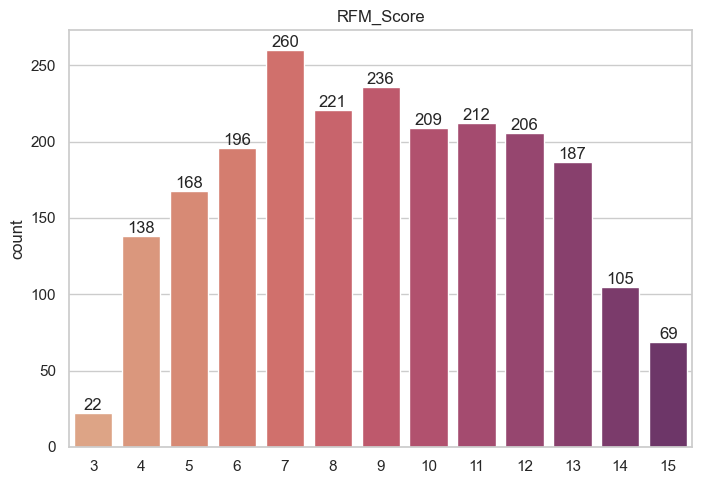

In [50]:
flare = sns.color_palette("flare", 15)

sns_plots(data=rfm, features=['RFM_Score'], countplot=True, palette=flare)

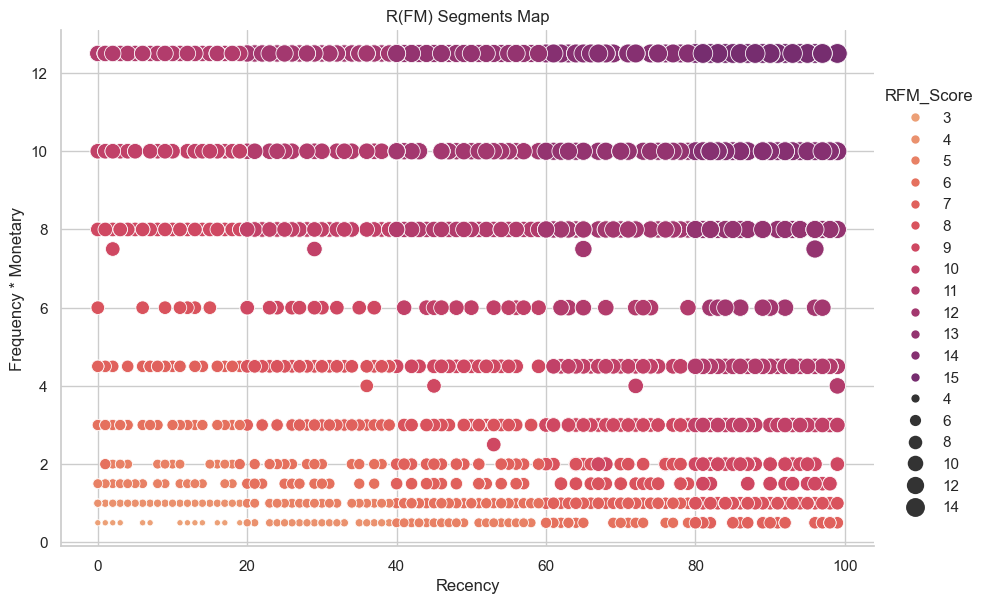

In [56]:
rfm['rf_segments'] = (rfm['m_segment'] * rfm['f_segment']) / 2
rfm['RFM_Score'].value_counts(normalize=True)
sns.relplot(data=rfm, x='recency', y='rf_segments', hue='RFM_Score', size='RFM_Score', sizes=(20, 200), palette=flare, height=6, aspect=1.5)
plt.title('R(FM) Segments Map')
plt.ylabel('Frequency * Monetary')
plt.xlabel('Recency')
plt.show()

## Conclusions

1. The product spending features are skewed to the right, meaning that while most customers spend less, some do so considerably more. Among all product categories, wine has the greatest average spending.

2. Features related to purchase frequency also show a little right skew. In general, consumers make more purchases in-person or online; outliers signify customers who make transactions frequently.

3. The efficacy of the store's existing initiatives is minimal, as only a tiny percentage of consumers participate in any given campaign. This emphasises how important clustering research is for more precise campaign targeting across client segments.

4. While some clients have no childs living at home, the majority has at least one. Few people have two kids. The majority of clients also have partners and are recent grads.

5. There is a substantial negative correlation between income and having children at home, indicating that consumers with higher incomes typically have fewer or no children, and vice versa.

6. Spending on pricey goods like wine and meat is positively correlated with income. Given that higher-income consumers typically buy these things more frequently, this association seems sense.

7. Income and catalogue and in-store purchases have a high positive correlation, whereas monthly online visits and income have a negative correlation. This emphasises how crucial it is to improve higher-income customers' catalogue and in-store shopping experiences.

8. Customers with higher incomes are more inclined to participate in marketing initiatives.

9. There is a somewhat good correlation between having childs at home and looking for deals while making purchases.

10. The amount spent on different product kinds is strongly inversely correlated with monthly site visits, suggesting that these things are frequently bought through alternative channels like catalogues and storefronts. Additionally, there is a somewhat positive link with bargain purchases, indicating that regular users of the website have a tendency to buy things at a discount.

11. Higher-income consumers were successfully targeted by Campaigns 1 and 5, especially when it came to wine and meat purchases. Customers who made larger purchases showed a significantly greater proportion of marketing acceptance.

In [52]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataset has 2229 rows and 29 columns.


In [53]:
df.to_csv('dataset/marketing_campaign_clean.csv', index=False)